## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import os
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [54]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [55]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [56]:
# Checking the number of mice.
df = mouse_metadata 
df['Mouse ID'].count()

249

In [57]:
#combining mousemetadata and results 
results_mouse_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
results_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df = results_mouse_data.duplicated(['Mouse ID', 'Timepoint'])
results_mouse_data.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [59]:
#find the duplicate mouse 
study_data_mice = results_mouse_data.set_index('Mouse ID')
mouse = study_data_mice.loc['g989', :]
mouse.head(20).count()

Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
DataFrame.drop_duplicates(mouse)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1
g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Checking the number of mice in the clean DataFrame.
DataFrame.drop_duplicates(mouse).count()

Drug Regimen          12
Sex                   12
Age_months            12
Weight (g)            12
Timepoint             12
Tumor Volume (mm3)    12
Metastatic Sites      12
dtype: int64

In [88]:
results_mouse_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
results_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
# Sort merged database by Tumor Volume to allow for median values to be correct
results_mouse_data_sort = results_mouse_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

results_mouse_data_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
table_stats_sort = results_mouse_data_sort.groupby(["Drug Regimen"])
table_mean = table_stats_sort["Tumor Volume (mm3)"].mean()
table_median = table_stats_sort["Tumor Volume (mm3)"].median()       
table_variance = table_stats_sort["Tumor Volume (mm3)"].var()
table_std = table_stats_sort["Tumor Volume (mm3)"].std()
table_sem = table_stats_sort["Tumor Volume (mm3)"].sem()


In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#   and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
table_stats_sort = pd.DataFrame({"Mean": table_mean, "Median":table_median, "Variance":table_variance, 
                              "Standard Deviation": table_std, "SEM":table_sem})
table_stats_sort

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [126]:
#create data points 
regimen_data_points = results_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

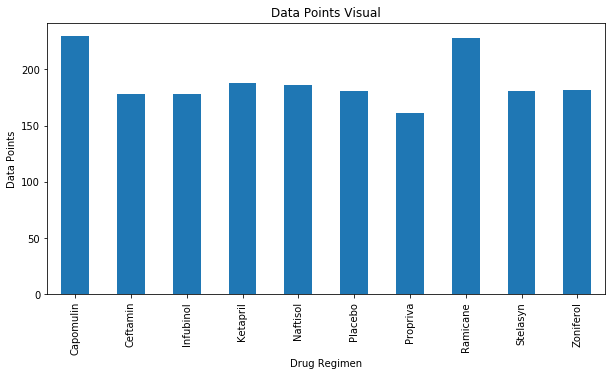

<Figure size 432x288 with 0 Axes>

In [127]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the 
#study using pandas. 

regimen_data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

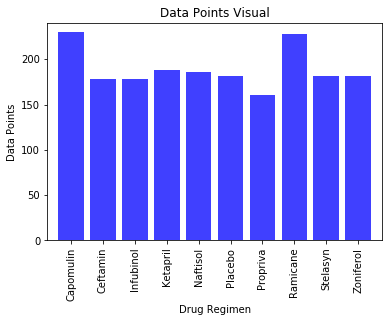

In [130]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bargraph_datapoints = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
#regimen data
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, bargraph_datapoints, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(bargraph_datapoints)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = results_mouse_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


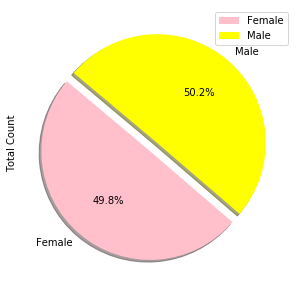

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['pink', 'yellow']
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, 
                             shadow = True, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [204]:
# Start by getting the last (greatest) timepoint for each mouse
max_df = results_mouse_data.groupby('Mouse ID')['Timepoint'].max()
max_df =results_mouse_data .sort_values(["Timepoint"], ascending=True)
max_df
# Using reset_index will return the series as a dataframe
max_df = max_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [206]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = results_mouse_data.merge(max_df, on=['Mouse ID', 'Timepoint'])
max_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,x401,Capomulin,Female,16,15,45,28.484033,0
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 
                            'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
